## Importation du jeu de données

In [2]:
import pandas as pd

df = pd.read_csv('./valeursfoncieres-2021/valeursfoncieres-2021.txt', sep="|", decimal=",")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: './valeursfoncieres-2021/valeursfoncieres-2021.txt'

### Suppression des colonnes / lignes inutiles du fichier

In [ ]:
print("Taille de notre dataframe sans les colonnes contenant que des NaN :", df.shape)

Taille de notre dataframe sans les colonnes contenant que des NaN : (4649209, 43)


In [ ]:
### Suppression de colonnes dont on a aucune données
df_wo_NaN = df.dropna(axis=1, how='all') 

In [ ]:
# Nouvelle colonne 'col_concat' avec l'adresse et la date de vente jointe
cols_to_join = ['Date mutation', 'Type de voie', 'No voie', 'Code voie', 'Voie', 'Code postal', 'Commune']
df_wo_NaN['col_concat'] = df_wo_NaN[cols_to_join].apply(lambda x: ''.join(map(str,x)), axis=1)
df_wo_NaN.head(5)

NameError: name 'df_wo_NaN' is not defined

In [ ]:
# On supprime les lignes ayant la même valeur dans col_concat
df_wo_NaN = df_wo_NaN.drop_duplicates(subset='col_concat', keep=False)
df_wo_NaN

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,col_concat
2,1,06/01/2021,Vente,10.0,NaN,NaN,NaN,B043,ROUGEMONT,1290.0,...,NaN,0,NaN,NaN,NaN,NaN,BT,NaN,530.0,06/01/2021nannanB043ROUGEMONT1290.0BEY
3,1,04/01/2021,Vente,204332.0,7.0,NaN,ALL,0276,DES ECUREUILS,1310.0,...,NaN,0,1.0,Maison,88.0,4.0,S,NaN,866.0,04/01/2021ALL7.00276DES ECUREUILS1310.0BUELLAS
6,2,04/01/2021,Vente,36.3,NaN,NaN,NaN,B077,COMBET MAILLET,1250.0,...,NaN,0,NaN,NaN,NaN,NaN,BT,NaN,121.0,04/01/2021nannanB077COMBET MAILLET1250.0CORVEI...
9,2,11/01/2021,Vente,400.0,NaN,NaN,NaN,B085,PRE BROUILLET,1310.0,...,NaN,0,NaN,NaN,NaN,NaN,P,NaN,460.0,11/01/2021nannanB085PRE BROUILLET1310.0MONTCET
12,1,07/01/2021,Vente,4780.0,NaN,NaN,NaN,B013,BERARDAN,1340.0,...,NaN,0,NaN,NaN,NaN,NaN,P,NaN,7105.0,07/01/2021nannanB013BERARDAN1340.0FOISSIAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4649204,1,12/03/2021,Vente,383000.0,8.0,NaN,RUE,9382,DES TOURNELLES,75004.0,...,NaN,2,2.0,Appartement,30.0,2.0,NaN,NaN,NaN,12/03/2021RUE8.09382DES TOURNELLES75004.0PARIS 04
4649205,1,17/03/2021,Vente,260000.0,8.0,NaN,RUE,8561,SAINTE FOY,75002.0,...,NaN,2,2.0,Appartement,37.0,2.0,NaN,NaN,NaN,17/03/2021RUE8.08561SAINTE FOY75002.0PARIS 02
4649206,1,19/03/2021,Vente,38000.0,6.0,NaN,RUE,4398,DES GUILLEMITES,75004.0,...,NaN,1,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN,19/03/2021RUE6.04398DES GUILLEMITES75004.0PARI...
4649207,1,30/03/2021,Vente,38000.0,30.0,NaN,RUE,7338,DU PETIT MUSC,75004.0,...,NaN,1,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN,30/03/2021RUE30.07338DU PETIT MUSC75004.0PARIS 04


In [4]:
# pourcentage des valeurs manquantes dans chaque colonne 
pourcentage_manquant = (df_wo_NaN.isna().sum() / len(df_wo_NaN)) * 100
pourcentage_manquant

NameError: name 'df_wo_NaN' is not defined

In [3]:
pourcentage_manquant = pourcentage_manquant.sort_values(ascending=False)
pourcentage_manquant 

NameError: name 'pourcentage_manquant' is not defined

In [ ]:
print("Taille de notre dataframe sans les colonnes contenant que des NaN :", df_wo_NaN.shape)

Taille de notre dataframe sans les colonnes contenant que des NaN : (1000, 31)


On veut retrouver les colonnes qui ont été supprimées

In [ ]:
list(df.columns)

colonnes_suppr = [col for col in df if col not in df_wo_NaN.columns]

print("Les colonnes supprimées sont :", colonnes_suppr)

Les colonnes supprimées sont : ['Identifiant de document', 'Reference document', '1 Articles CGI', '2 Articles CGI', '3 Articles CGI', '4 Articles CGI', '5 Articles CGI', 'No Volume', 'Surface Carrez du 3eme lot', 'Surface Carrez du 4eme lot', 'Surface Carrez du 5eme lot', 'Identifiant local']


In [ ]:
df_wo_NaN["Nature mutation"].unique()

array(['Vente', "Vente en l'état futur d'achèvement", 'Echange',
       'Vente terrain à bâtir'], dtype=object)

Nombre de ventes

In [ ]:
df_wo_NaN["Nature mutation"].value_counts()

Vente                                 981
Vente en l'état futur d'achèvement     14
Echange                                 4
Vente terrain à bâtir                   1
Name: Nature mutation, dtype: int64

Evolution des ventes

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df_wo_NaN['Date mutation']

0      05/01/2021
1      05/01/2021
2      06/01/2021
3      04/01/2021
4      06/01/2021
          ...    
995    11/02/2021
996    11/02/2021
997    11/02/2021
998    01/02/2021
999    15/02/2021
Name: Date mutation, Length: 1000, dtype: object

c:\Users\bourh\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/01/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\bourh\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/01/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\bourh\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/01/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\bourh\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/01/2021' in DD/MM/YYYY format. Provide format or specif

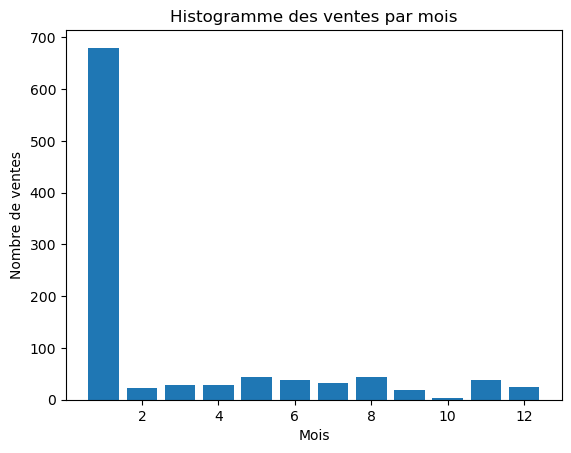

In [ ]:
# Convertissez la colonne 'Date' en type datetime
df_wo_NaN['Date mutation'] = pd.to_datetime(df['Date mutation'])

# Extrayez le mois de chaque date et créez une nouvelle colonne 'Mois'
df_wo_NaN['Mois'] = df_wo_NaN['Date mutation'].dt.month

# Groupez les ventes par mois et comptez le nombre de ventes dans chaque mois
ventes_par_mois = df_wo_NaN.groupby('Mois')['Nature mutation'].count()

# Créez un histogramme
plt.bar(ventes_par_mois.index, ventes_par_mois.values)

# Étiquetez les axes et le titre
plt.xlabel('Mois')
plt.ylabel('Nombre de ventes')
plt.title('Histogramme des ventes par mois')

# Affichez l'histogramme
plt.show()


In [ ]:
# df_ventes_par_mois = pd.DataFrame(ventes_par_mois, index=False)
df_ventes_par_mois = ventes_par_mois.to_frame().reset_index()
df_ventes_par_mois.columns

Index(['Mois', 'Nature mutation'], dtype='object')

In [ ]:
import plotly.express as px

fig = px.line(df_ventes_par_mois, x="Mois", y="Nature mutation", title='Ventes par mois')
fig.show()

In [ ]:
df_scatter = df_wo_NaN.head(1000)[['Commune', 'Valeur fonciere']]
df_scatter

,Commune,Valeur fonciere
0,VAL-REVERMONT,185000.0
1,VAL-REVERMONT,185000.0
2,BEY,10.0
3,BUELLAS,204332.0
4,MONTAGNAT,320000.0
...,...,...
995,NEUVILLE-SUR-AIN,440000.0
996,NEUVILLE-SUR-AIN,440000.0
997,NEUVILLE-SUR-AIN,440000.0
998,PONT-DE-VEYLE,30000.0


In [ ]:
fig = px.scatter(df_scatter, x='Commune', y="Valeur fonciere")
fig.show()

In [ ]:
print("Il y a", len(df_wo_NaN["Commune"].unique()), "communes")

Il y a 30986 communes


On souhaite enlever les doublons

In [ ]:
df_wo_NaN.keys()

Index(['No disposition', 'Date mutation', 'Nature mutation', 'Valeur fonciere',
       'No voie', 'B/T/Q', 'Type de voie', 'Code voie', 'Voie', 'Code postal',
       'Commune', 'Code departement', 'Code commune', 'Prefixe de section',
       'Section', 'No plan', '1er lot', 'Surface Carrez du 1er lot',
       '2eme lot', 'Surface Carrez du 2eme lot', '3eme lot', '4eme lot',
       '5eme lot', 'Nombre de lots', 'Code type local', 'Type local',
       'Surface reelle bati', 'Nombre pieces principales', 'Nature culture',
       'Nature culture speciale', 'Surface terrain', 'Mois'],
      dtype='object')

,Date mutation,Type de voie,No voie,Code voie,Voie,Code postal,Commune
0,2021-05-01,CHE,5080.0,0471,DE VOGELAS,1370,VAL-REVERMONT
1,2021-05-01,CHE,5080.0,0471,DE VOGELAS,1370,VAL-REVERMONT
2,2021-06-01,NaN,NaN,B043,ROUGEMONT,1290,BEY
3,2021-04-01,ALL,7.0,0276,DES ECUREUILS,1310,BUELLAS
4,2021-06-01,RTE,87.0,0140,DE CERTINES,1250,MONTAGNAT
...,...,...,...,...,...,...,...
995,2021-11-02,RUE,448.0,0325,NICOLAS AUBRY,1160,NEUVILLE-SUR-AIN
996,2021-11-02,NaN,NaN,B143,LA CRAZ,1160,NEUVILLE-SUR-AIN
997,2021-11-02,NaN,NaN,B143,LA CRAZ,1160,NEUVILLE-SUR-AIN
998,2021-01-02,NaN,5338.0,B006,GRAND FAUBOURG,1290,PONT-DE-VEYLE


C:\Users\bourh\AppData\Local\Temp\ipykernel_2524\1528298497.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wo_NaN.loc[:,'Date mutation'] = df_wo_NaN['Date mutation'].astype(str)


In [ ]:
''.join(map(str,df_wo_NaN.loc[1]))

'12021-05-01 00:00:00Vente185000.05080.0nanCHE0471DE VOGELAS1370VAL-REVERMONT1426312.0ZC122nannannannannannannan03.0Dépendance0.00.0Snan2410.05'